<a href="https://colab.research.google.com/github/taadith/python-projects/blob/main/intro-stat-learning/labs/ISLP_Lab_Ch_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistical Learning - Lab 02
Dataset provided by Introduction to Statistical Learning
(from this website: https://www.statlearning.com/resources-python)

**Note: Assuming that *Auto.csv* is in same folder as this notebook.**

## Installing libraries

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

##Basic Commands

The *?* command helps provide information about functions by providing it's respective Docstring. Here's the *print()*'s function Docstring...

In [3]:
print?

In [4]:
print("fit a model with", 11, "variables")

fit a model with 11 variables


In Python, there are three important type of sequences, ordered lists: lists, tuples, and strings. We introduce lists...

In [5]:
x = [1, 2, 3]
y = [4, 5, 6]
x + y

[1, 2, 3, 4, 5, 6]

In Python, lists hold arbitary objects and are added by concatentation, not element-by-element. This makes sense since Python is designed as a general-purpose programming language. Python's data-specific functionality comes from the *numpy* and *pandas* packages!

## Intro to Numerical Python

In [6]:
import numpy as np

###Numpy Arrays

In numpy, an array is a generic term for a multidimensional set, in the non-mathematical sense, of numbers.

In [7]:
np.array?

We see that the numpy arrays are added to each other element-by-element instead of being concatenated!!! Yayyy!

In [8]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x + y

array([5, 7, 9])

Besides one-dimensional numpy arrays, we can essentially make a n-dimensional numpy array, where n is any integer greater than or equal to 1 that is computationally possible.

In [9]:
x_1d = np.array([1, 2])
x_2d = np.array([[1, 2], [3, 4]])
x_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]], [[13, 14], [15, 16]]])

We can observe the dimensions of a numpy array using the attribute *ndim*.

In [10]:
print("x_1d dimensions:", x_1d.ndim)
print("x_2d dimensions:", x_2d.ndim)
print("x_3d dimensions:", x_3d.ndim)

x_1d dimensions: 1
x_2d dimensions: 2
x_3d dimensions: 3


Along with the dimensions of the numpy array, the shape of the array itself can be observed with the *shape* attribute.

In [11]:
print("x_1d shape:", x_1d.shape)
print("x_2d shape:", x_2d.shape)
print("x_3d shape:", x_3d.shape)

x_1d shape: (2,)
x_2d shape: (2, 2)
x_3d shape: (4, 2, 2)


The data type stored within the numpy array can be observed using *dtype()*.

In [12]:
print("x_1d dtype:", x_1d.dtype)
print("x_2d dtype:", x_2d.dtype)
print("x_3d dtype:", x_3d.dtype)

x_1d dtype: int64
x_2d dtype: int64
x_3d dtype: int64


The *reshape()* method returns a new array with the same elements the numpy array that calls.

In [13]:
np.reshape?

In [14]:
x = np.array([1, 2, 3, 4, 5, 6])
x_reshape = x.reshape(2, 3)
x, x_reshape

(array([1, 2, 3, 4, 5, 6]),
 array([[1, 2, 3],
        [4, 5, 6]]))

It's important to note that x and x.reshape occupy the same memory region. We can observe this by modifying x_reshape and then observing the two...

In [15]:
x_reshape[0, 0] = 99
x, x_reshape

(array([99,  2,  3,  4,  5,  6]),
 array([[99,  2,  3],
        [ 4,  5,  6]]))

...heyyyy this reminds me of a pointer

Interestingly, we cannot modify a tuple!

In [17]:
tup = (1, 2, 3)
tup[0] = 99

TypeError: 'tuple' object does not support item assignment

###Generating random data



The *np.random.normal()* function generates a vector of random normal variables...

In [18]:
np.random.normal?

From the generated Docstring's first line, we see
```
normal(loc=0.0, scale=1.0, size=None)
```
This means that the function, by default, will generate random normal variable(s) with a mean (loc) of 0 and a standard deviation (scale) of 1. Furthermore, a single random variable will be generated unless *size*'s argument is changed.

We will now generate 50 random independent variables from a *N*(0, 1) distribution...

In [19]:
x = np.random.normal(0, 1, 50)
x

array([ 0.38521506,  0.26214353, -1.22245291,  0.96787674,  0.82648705,
       -0.52723413,  1.54907585,  0.45483918,  0.16850297,  1.25681873,
       -0.93848604, -0.19983447, -0.60568967,  0.08201279, -0.32488171,
        0.36991832,  1.18644116, -0.27449295,  1.30665838,  1.0377359 ,
        0.0969345 ,  1.40625628,  1.14515594,  1.85359961,  0.36510517,
       -0.70246141, -0.41498214, -2.06716932, -0.02624345, -0.94114118,
       -0.15767778,  0.91625677,  0.33316579, -0.36694152,  1.55406028,
       -0.02106612, -0.43788231, -0.55518818,  0.64878542, -0.58534784,
        0.43200191,  0.67297246,  1.99886659,  0.4749922 , -0.53948023,
        0.15698739,  1.37019685, -0.71556585,  0.32583631, -0.50114883])

We can create an array y by adding an independent *N*(0, 1)* random variable to each element of *x*...

In [20]:
y = x + np.random.normal(0, 1, 50)
y

array([ 0.3986189 ,  0.78798264, -1.56124063,  1.60338595,  2.03061471,
        0.58042046,  2.85952512,  1.92865465, -0.05389425,  1.82154525,
       -2.30355125, -1.30558059, -0.97889495,  0.87657481, -1.3426261 ,
        0.56681872,  2.01423357,  0.72461414,  1.70153471,  2.64828793,
       -0.39701498,  0.86889452,  2.09079333,  1.63176404, -0.97430634,
       -1.16234702, -0.94998291, -3.0283091 , -0.85499515, -1.43409022,
       -2.00876251,  1.75128721,  0.70751034, -0.60317564,  2.32509072,
        0.80014896, -0.35678562,  0.54706264, -0.53086888, -1.25430155,
        0.57644852,  1.58749229,  2.44196646,  0.66946044, -0.32218291,
       -0.98230516,  1.03734774, -0.32530695, -0.21067835, -1.60306567])

We can calulate the correlation matrix between *x* and *y* using the *np.corrcoef()* function. The off-diagonal elements gives the correlation between *x* and *y*.

In [21]:
np.corrcoef?

In [22]:
np.corrcoef(x, y)

array([[1.       , 0.8399544],
       [0.8399544, 1.       ]])

In order to ensure that the code provides reproducible results, we can set the random seed using *np.random.default_rng()*.

In [23]:
np.random.default_rng?

In [24]:
rng = np.random.default_rng(3)

We can use the *np.mean()*, *np.var()*, and *np.std()* functions to compute the mean, variance, and standard deviation of arrays, respectively.

In [25]:
np.mean?

In [26]:
x = rng.standard_normal(10)
np.mean(x), x.mean()

(-0.1126795190952861, -0.1126795190952861)

By default, *np.var()* divides by the sample size *n* rather than *n - 1*. For more information, we should inspect the *ddof*, or degrees of freedom, argument seen in *np.var?*

In [27]:
np.var?

By default, *ddof* is set to zero.

In [28]:
np.var(x), x.var(), np.mean((y - y.mean())**2)

(2.7243406406465125, 2.7243406406465125, 2.019029936266005)

In [29]:
np.std?

In [30]:
np.sqrt(np.var(y)), np.std(y)

(1.4209257321429594, 1.4209257321429594)

We can also apply the *np.mean()*, *np.var()*, and *np.std()* functions to the rows and columns of a matrix...

In [31]:
X = rng.standard_normal((5, 5))
X

array([[ 0.22578661, -0.35263079, -0.28128742, -0.66804635, -1.05515055],
       [-0.39080098,  0.48194539, -0.23855361,  0.9577587 , -0.19980213],
       [ 0.02425957,  1.54582085,  0.54510552, -0.50522874, -0.18283897],
       [ 0.54052513,  1.93508803, -0.26962033, -0.24355868,  1.0023136 ],
       [-0.88645994, -0.29172023,  0.88253897,  0.58035002,  0.0915167 ]])

Arrays are row-major ordered, so the first axis (*axis=0*) refers to its rows. This argument is passed into the *mean()* method for the object X...

In [32]:
X.mean(axis=0)

array([-0.09733792,  0.66370065,  0.12763663,  0.02425499, -0.06879227])

We can also just pass in *0* to represent row-major order...

In [33]:
X.mean(0)

array([-0.09733792,  0.66370065,  0.12763663,  0.02425499, -0.06879227])

##Graphics

###2D Plotting w/ the *matplotlib* library

In Python, it's common practice to use the *matplotlib* library for graphics. This is because Python, itself, was not written with data analysis in mind, so plotting is not intrinsic to the language. We will use *subplots()* from *matplotlib.pyplot* to create the figure and the axes onto which we plot our data.

In [34]:
from matplotlib.pyplot import subplots
subplots?

The function returns a tuple of length two: a figure object as well as the relevant axes object. We will typically pass *figsize* as a keyword argument and then attempt our first plot using the axes' ```plot()``` method.

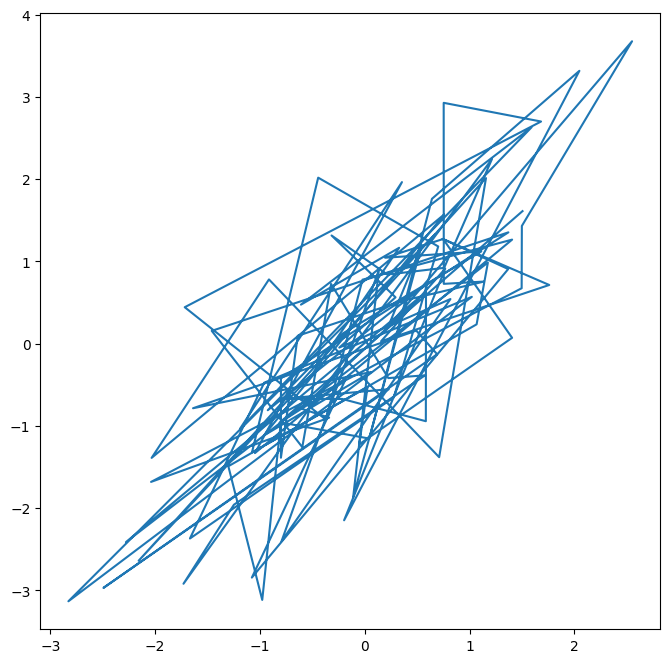

In [35]:
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100)
y = x + rng.standard_normal(100)
ax.plot(x, y);

To create a scatterplot, we provide an additional argument to ax.plot(), indicating that circles should be displayed

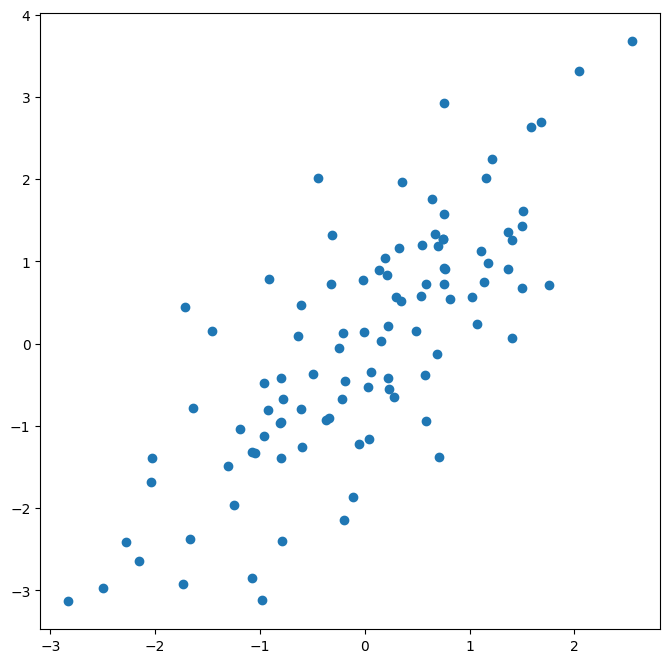

In [36]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o');

Alternatively, we could have used the ```ax.scatter()``` function to create a scatterplot.

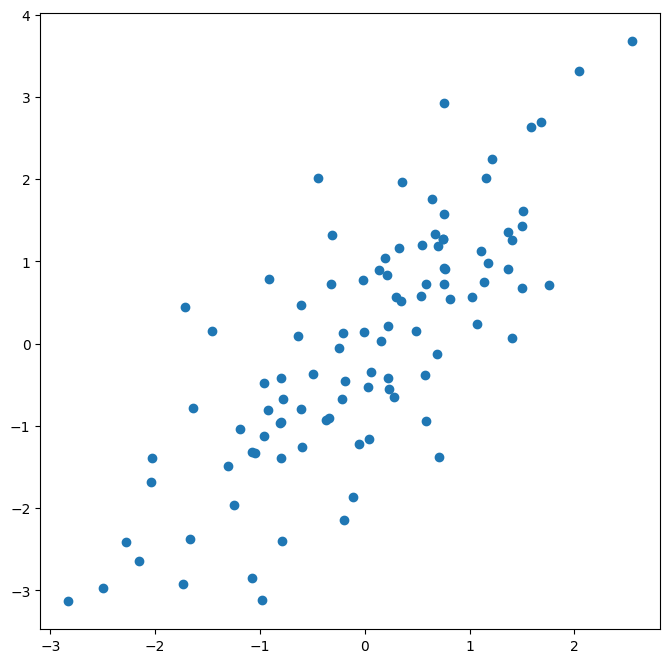

In [37]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o');

***Note: In the code blocks above, we ended the last line with a semicolon to prevent ```ax.plot(x, y)``` or ```ax.scatter(x, y)``` from printing text to the notebook.***

An example of the text that precedes the printed plot...

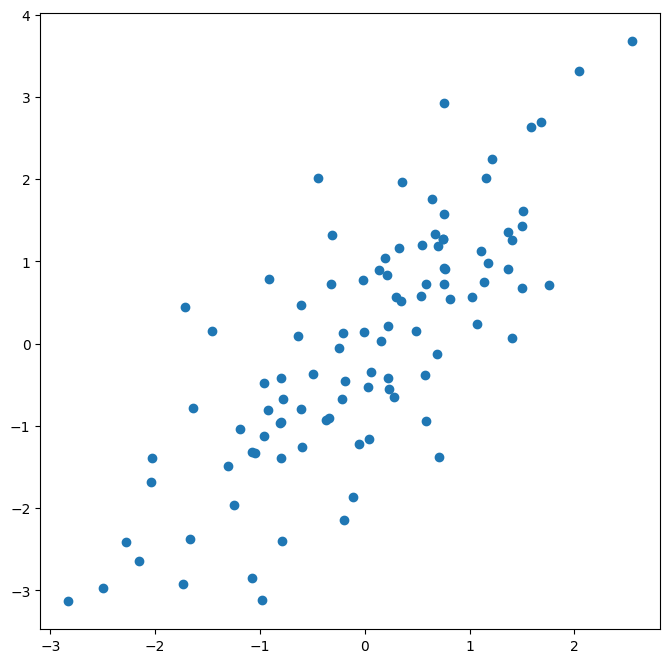

In [38]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o')

To label our plot, we can make use of the following methods for ```ax```: ```set_xlabel()```, ```set_ylabel()```, and ```set_title()```...

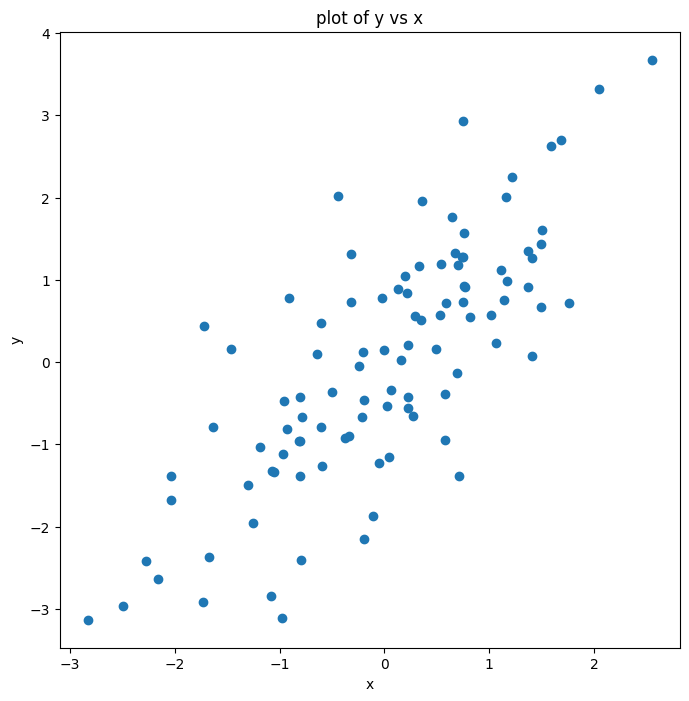

In [39]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker = 'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot of y vs x');

Having access to the figure object ```fig``` means we can change some aspects and redisplay it. In the following code, we chage the size from (8, 8) to (12, 3)...

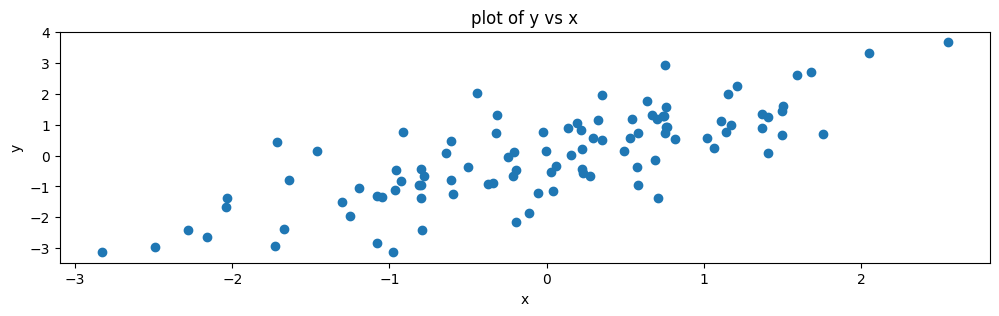

In [40]:
fig.set_size_inches(12, 3)
fig

We can also create several plots within one figure object. We do this by providing additional arguments to ```subplots()```. Below, we create a 2 x 3 grid of plots in a figure of size determine by the ```figsize``` argument. Sometimes, there is often a relationship between axes in the plots, e.g., all plots may have a common x-axis. If this is the case, the ```subplots()``` function can automatically handle this when passed the keyword argument ```sharex = True```. The ```axes``` object below is an array pointing to different plots in the figure.

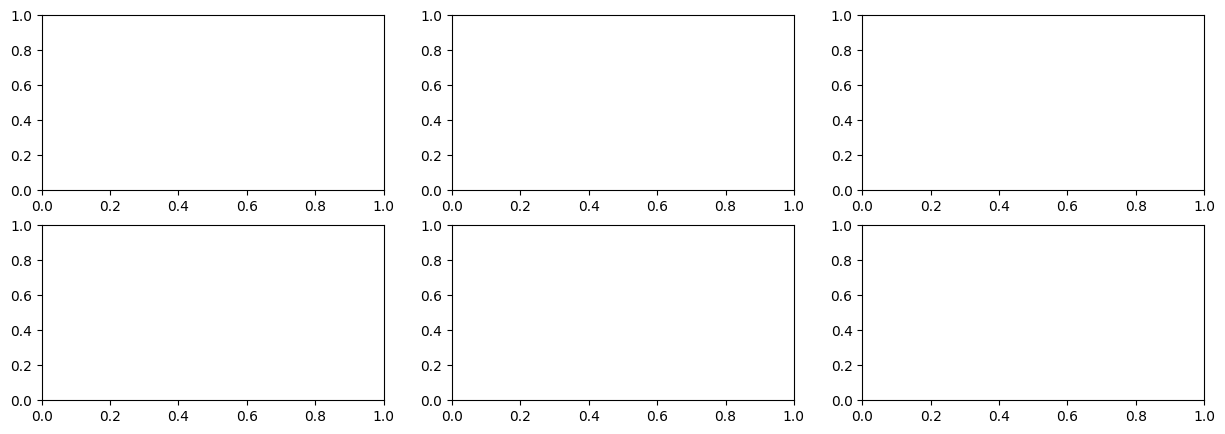

In [41]:
fig, axes = subplots(nrows = 2,
                     ncols = 3,
                     figsize = (15, 5)
)

We produce a scatterplot with ```'o'``` in the second column of the first row and a scatter plot with ```'+'``` in the third column of the second row...

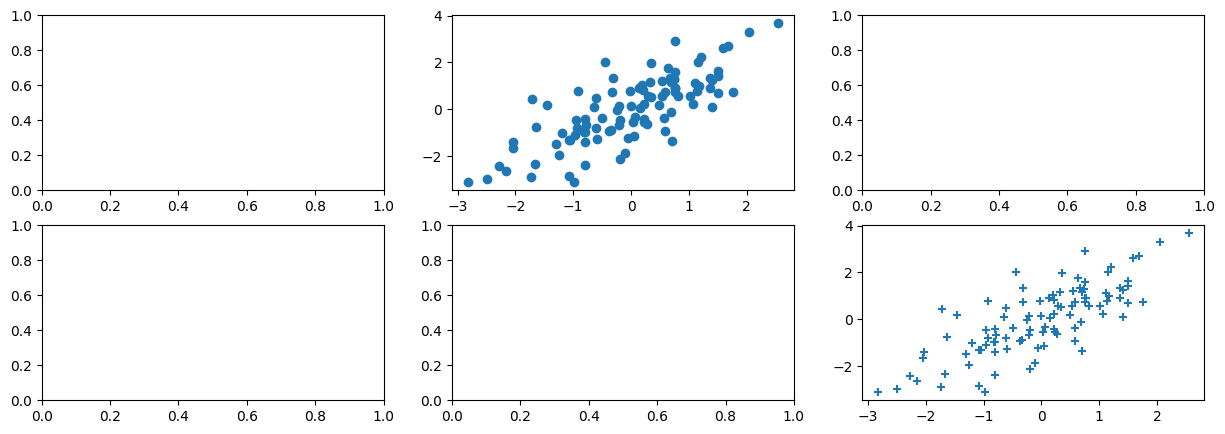

In [42]:
axes[0, 1].scatter(x, y, marker = 'o')
axes[1, 2].scatter(x, y, marker = '+')
fig

To save the output of ```fig```, we call its ```savefig()``` method. The argument ```dpi``` refers to dots per inch, used to determine how large the figure will be in pixels. Uncomment the following code block to see the saved images...

In [43]:
# fig.savefig("fig.png", dpi = 400)
# fig.savefig("fig.pdf", dpi = 200)

We can continue to modify fig using step-by-step updates. In the following code block, we modify the range of the x-axis, re-save the figure (commented out line), and even re-display it.

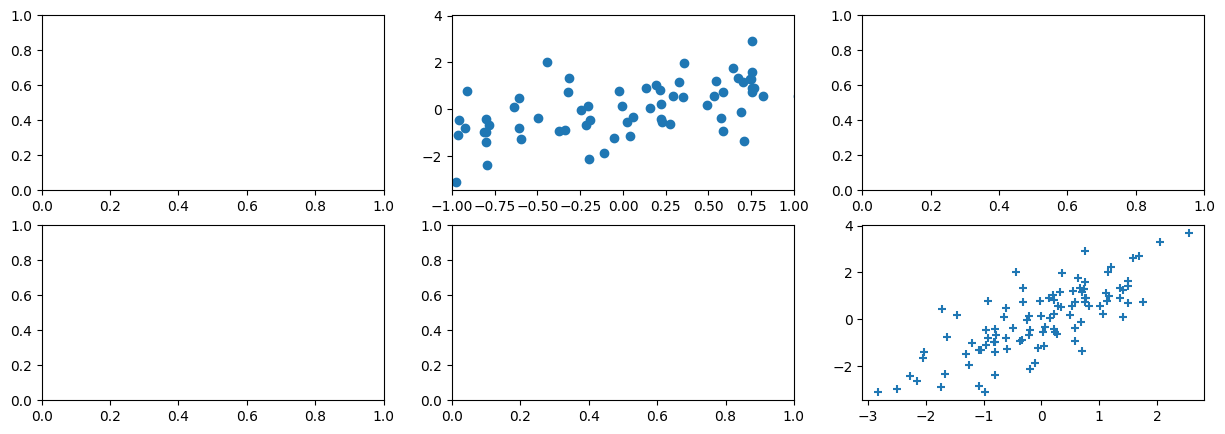

In [44]:
axes[0, 1].set_xlim([-1, 1])
# fig.savefig("fig_updated.jpg")
fig

###2D Plotting w/ the *seaborn* library
***Note: this section is not part of the txtbook***

*Seaborn* is a library for making statistical graphics, built on top of *matplotlib* and integrated closely with the *pandas* library's data structures.

*Seaborn* is the only library we need to import! Behind the scenes, *seaborn* uses *matplotlib* to draw its plots. For interactive work, it's recommended to use a Jupyter/IPython interface in *matplotlib* mode, or else we'll have to call ```matplotlib.pyplot.show()``` when we want to see the plot...

In [45]:
import seaborn as sns

We can choose how the matplotlib plots look using the ```sns.set_theme()``` function. In this case, we will apply the default theme, what is commonly referred to as the *matplotlib* rcParam  system.

In [60]:
sns.set_theme?

In [46]:
sns.set_theme()

Most code in the documentation will use the ```sns.load_dataset()``` function to get quick access to an example dataset. There's nothing special about these datasets; they are just *pandas* dataframes, and we could have loaded them in using ```pandas.read_csv()``` or built them by hand. *Seaborn* is typically very flexible about the data structures that it accepts.

In [48]:
sns.load_dataset?

Here, we read in the ```tips``` example dataset...

In [47]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can use the ```sns.relplot()``` function to plot data. It is named that way because it is designed to visualize many different statistical relationships.

In [51]:
sns.relplot?

The following plot shows the relationship between five variables in the ```tips``` dataset using a single call to the *seaborn* function ```sns.relplot()```. Notice how we only needed to provide the names of the variables and their roles in the plot. Unlike when using *matplotlib* directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes.

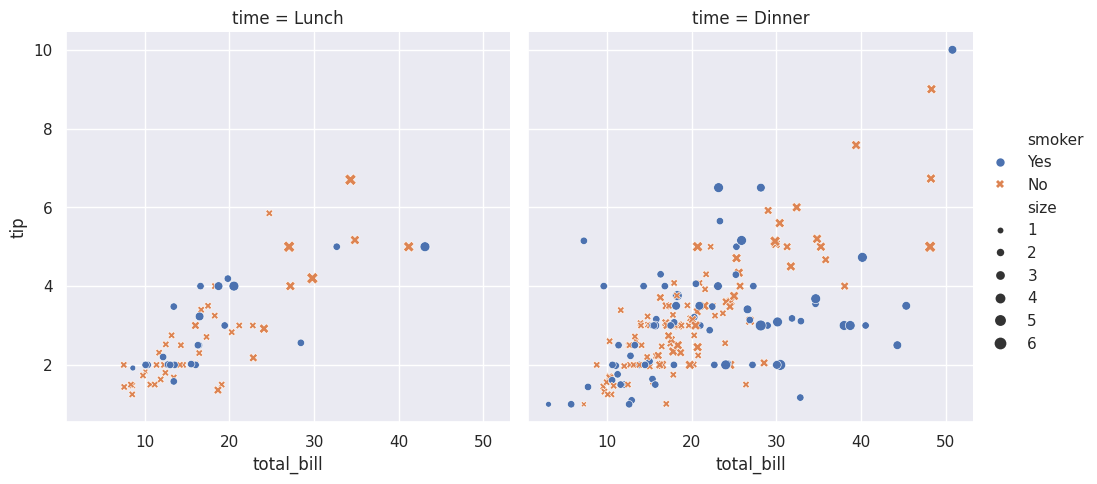

In [50]:
sns.relplot(data = tips,
            x = "total_bill", y = "tip", col = "time",
            hue = "smoker", style = "smoker", size = "size"
)

While scatter plots are often effective, relationships where one variable represents a measure of times are better represented by a line. The ```sns.relplot()``` function has a convenient ```kind``` parameter that lets you easily switch to this alternate representation....

As before, we load an example dataset provided to us by the *seaborn* library.

In [52]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


Notice how the ```size``` and ```style``` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want to convey.

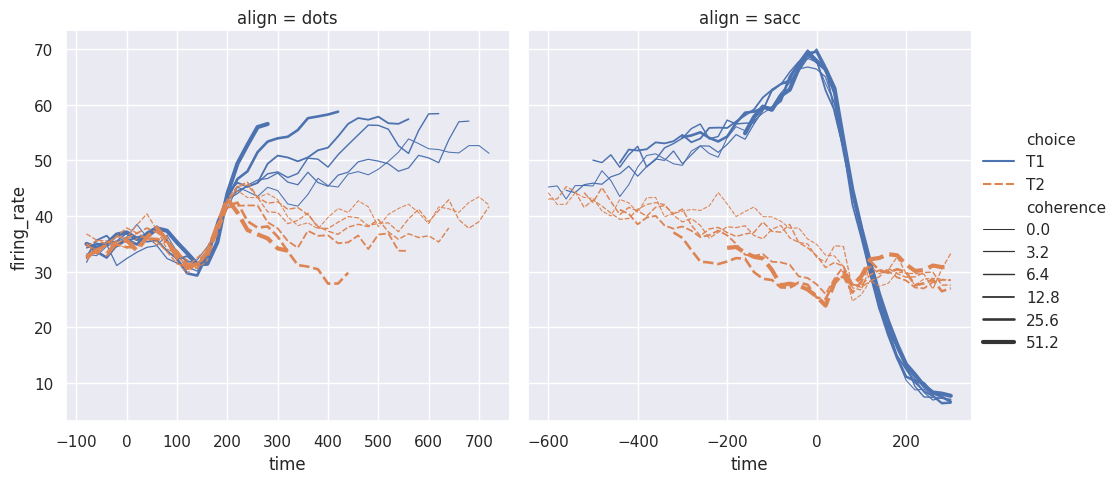

In [53]:
sns.relplot(
    data = dots, kind = "line",
    x = "time", y = "firing_rate", col = "align",
    hue = "choice", size = "coherence", style = "choice",
    facet_kws = dict(sharex = False)
)

Often, we are interested in the average value of one variable as a function of other variables. Many *seaborn* functions will automatically perform the statistical estimation that is necessary to answer these questions...

In [54]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


When statistical values are estimated, *seaborn* will use [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics) to compute confidence intervals and draw error bars representing the uncertainty of the estimate. Bootstrapping is a procedure where the dataset is randomly resampled with replacement a number of times and the estimate is recalculated from each resample.

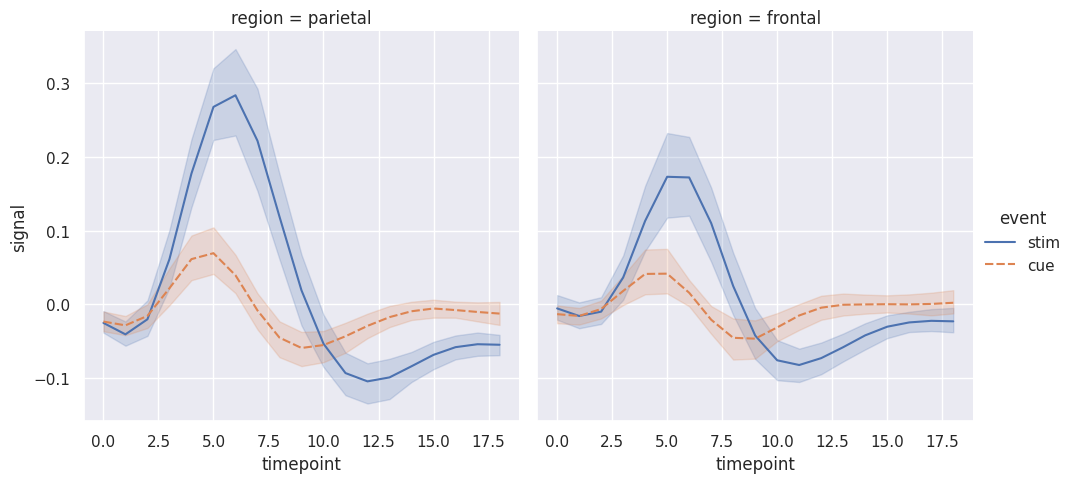

In [55]:
sns.relplot(
    data = fmri, kind = "line",
    x = "timepoint", y = "signal", col = "region",
    hue = "event", style = "event"
)

Statistical estimation in *seaborn* isn't just limited to descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using ```sns.lmplot()```...

In [61]:
sns.lmplot?

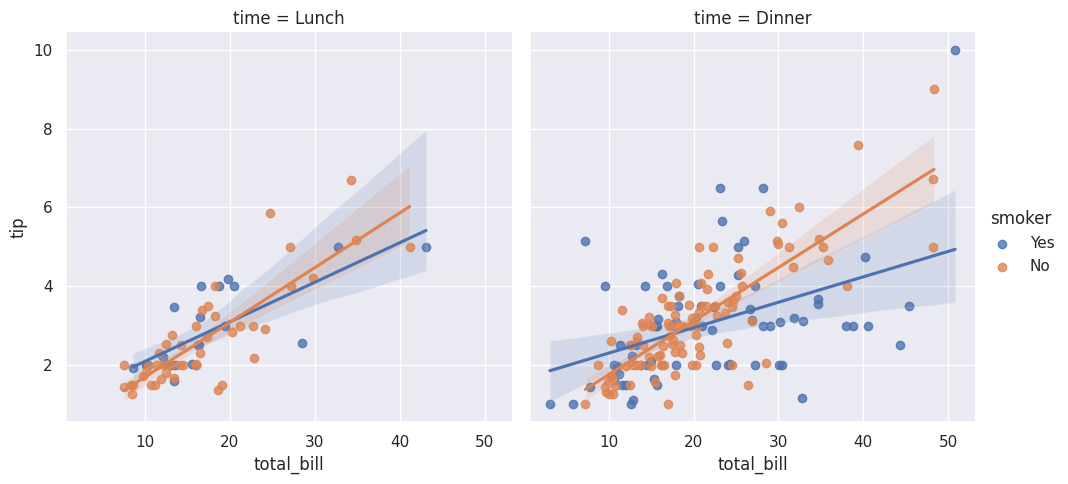

In [56]:
sns.lmplot(data = tips, x = "total_bill", y = "tip", col = "time", hue = "smoker")

The *seaborn* function ```sns.displot()``` supports several approaches to visualizing distributions

In [ ]:
sns.displot?

This includes classic techniques like histograms and computationally-intensive approaches like [kernel density estimation](https://mathisonian.github.io/kde/), i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights...

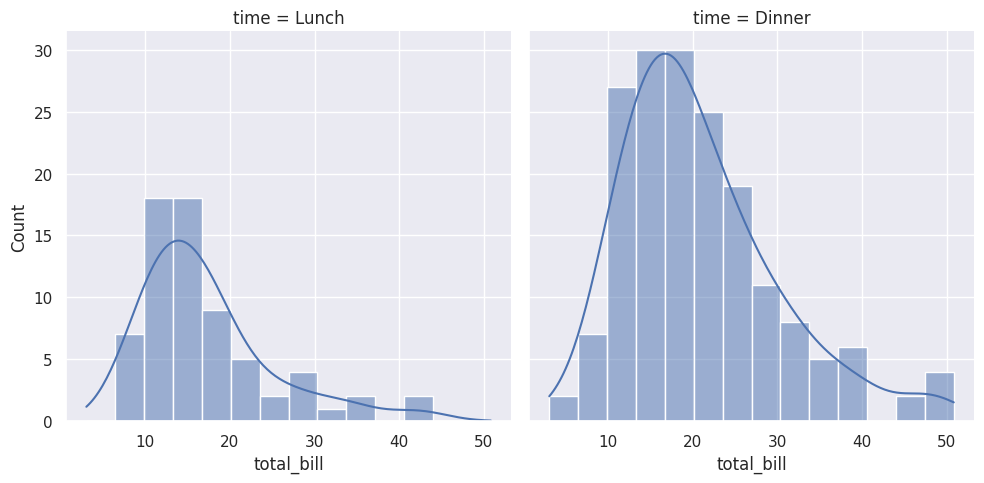

In [58]:
sns.displot(data = tips, x = "total_bill", col = "time", kde = True)

The *seaborn* library also promotes techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data...

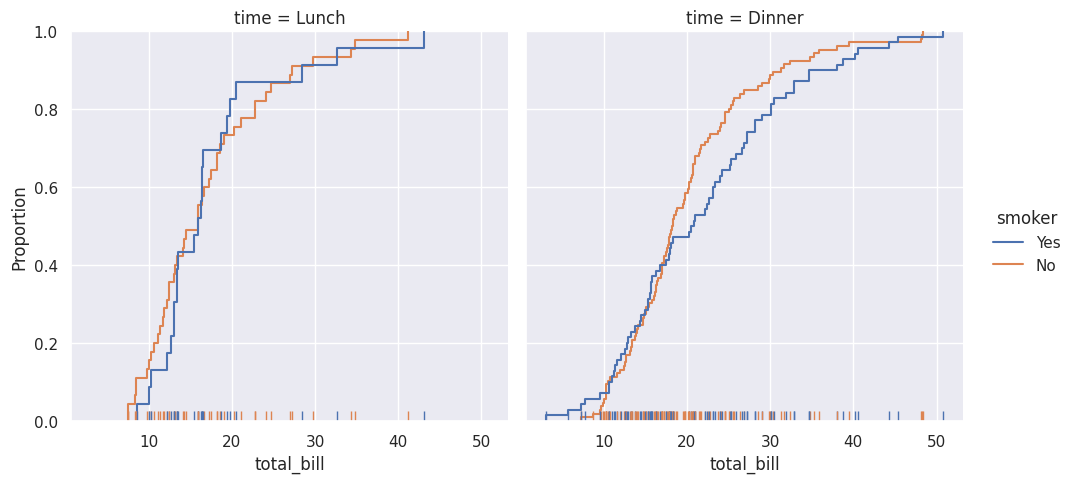

In [59]:
sns.displot(data = tips, kind = "ecdf",
            x = "total_bill", col = "time", hue = "smoker", rug = True
)

Several specialize plot types exist in the *seaborn* library are oriented towards visualizing categorical data. They can be accessed through ```sns.catplot()```.

In [62]:
sns.catplot?

These plots offer differing levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm" plot, a scatter plot that adjusts the positions of the points along the categorical axis so they don't overlap...

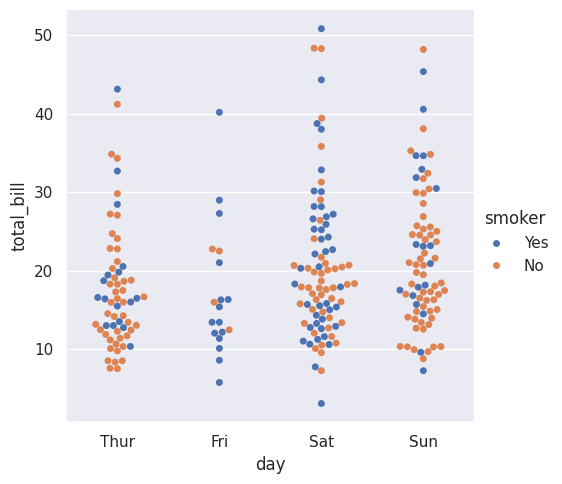

In [63]:
sns.catplot(data = tips, kind = "swarm", x = "day", y = "total_bill", hue = "smoker")

Alternatively, you could use kernel density estimation to represent the underlying distribution that the points are sampled from...

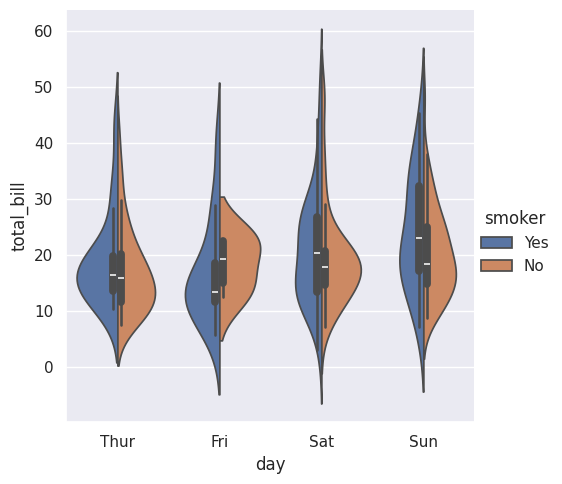

In [64]:
sns.catplot(data = tips, kind = "violin",
            x = "day", y = "total_bill", hue = "smoker", split = True
)

Or you could show only the mean value and its confidence interval within each nested category...

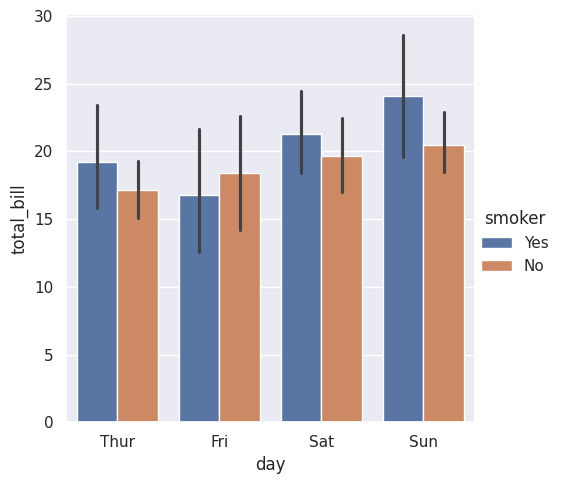

In [65]:
sns.catplot(data = tips, kind = "bar", x = "day", y = "total_bill", hue = "smoker")

###3D Plotting